# Later we'll customize this more

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-03-25 20:51:48.519080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-25 20:51:49.305864: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-25 20:51:49.464282: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-25 20:51:49.464324: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [4]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json


--2023-03-25 20:51:55--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.16.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  10.8MB/s    in 0.5s    

2023-03-25 20:51:56 (10.8 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [6]:
# with open("/tmp/sarcasm.json", 'r') as f:
with open("reviews.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    print(item)
    sentences.append(item['Review'])
    labels.append(item['Liked'])

{'Review': 'Wow... Loved this place.', 'Liked': 1}
{'Review': 'Crust is not good.', 'Liked': 0}
{'Review': 'Not tasty and the texture was just nasty.', 'Liked': 0}
{'Review': 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.', 'Liked': 1}
{'Review': 'The selection on the menu was great and so were the prices.', 'Liked': 1}
{'Review': 'Now I am getting angry and I want my damn pho.', 'Liked': 0}
{'Review': "Honeslty it didn't taste THAT fresh.)", 'Liked': 0}
{'Review': 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.', 'Liked': 0}
{'Review': 'The fries were great too.', 'Liked': 1}
{'Review': 'A great touch.', 'Liked': 1}
{'Review': 'Service was very prompt.', 'Liked': 1}
{'Review': 'Would not go back.', 'Liked': 0}
{'Review': 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.', 'Liked': 0}
{'Review': 'I tried the Cape Cod ravoli, chick

In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2023-03-25 20:51:58.605503: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-25 20:51:58.605918: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-25 20:51:58.606096: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-25 20:51:58.606196: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-25 20:51:58.606294: W tensorf

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

# validation_data: Data on which to evaluate
#                 the loss and any model metrics at the end of each epoch.
#                 The model will not be trained on this data. Thus, note the fact
#                 that the validation loss of data provided using
#                 `validation_split` or `validation_data` is not affected by
#                 regularization layers like noise and dropout.
#                 `validation_data` will override `validation_split`.
#                 `validation_data` could be:
#                   - A tuple `(x_val, y_val)` of Numpy arrays or tensors.
#                   - A tuple `(x_val, y_val, val_sample_weights)` of NumPy
#                     arrays.
#                   - A `tf.data.Dataset`.

Epoch 1/30
32/32 - 1s - loss: 0.6930 - accuracy: 0.5000 - 1s/epoch - 46ms/step
Epoch 2/30
32/32 - 0s - loss: 0.6920 - accuracy: 0.5200 - 180ms/epoch - 6ms/step
Epoch 3/30
32/32 - 0s - loss: 0.6904 - accuracy: 0.5780 - 163ms/epoch - 5ms/step
Epoch 4/30
32/32 - 0s - loss: 0.6877 - accuracy: 0.5440 - 152ms/epoch - 5ms/step
Epoch 5/30
32/32 - 0s - loss: 0.6845 - accuracy: 0.6920 - 164ms/epoch - 5ms/step
Epoch 6/30
32/32 - 0s - loss: 0.6786 - accuracy: 0.7650 - 170ms/epoch - 5ms/step
Epoch 7/30
32/32 - 0s - loss: 0.6706 - accuracy: 0.6850 - 162ms/epoch - 5ms/step
Epoch 8/30
32/32 - 0s - loss: 0.6597 - accuracy: 0.7240 - 163ms/epoch - 5ms/step
Epoch 9/30
32/32 - 0s - loss: 0.6428 - accuracy: 0.7940 - 134ms/epoch - 4ms/step
Epoch 10/30
32/32 - 0s - loss: 0.6186 - accuracy: 0.8330 - 159ms/epoch - 5ms/step
Epoch 11/30
32/32 - 0s - loss: 0.5938 - accuracy: 0.8090 - 171ms/epoch - 5ms/step
Epoch 12/30
32/32 - 0s - loss: 0.5594 - accuracy: 0.8650 - 155ms/epoch - 5ms/step
Epoch 13/30
32/32 - 0s - lo

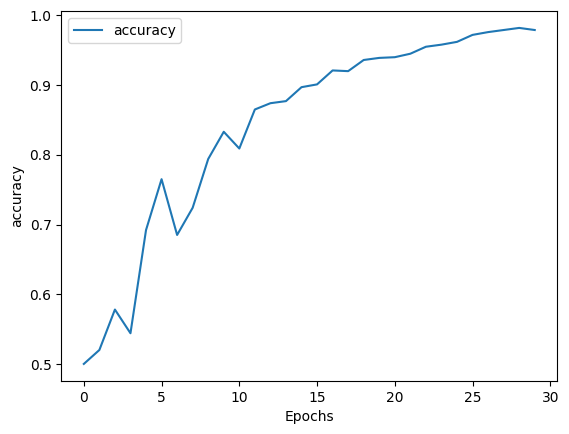

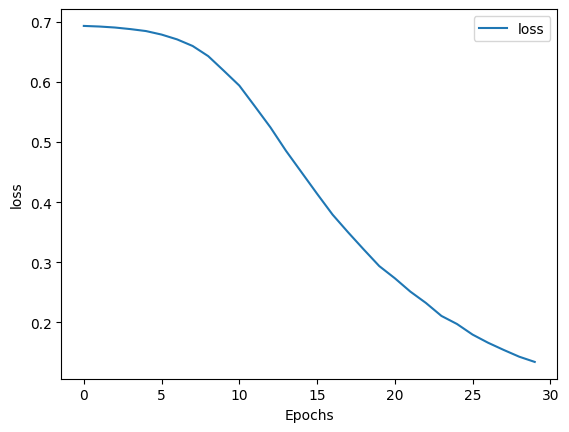

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  # plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

wow loved this place ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Not tasty and the texture was just nasty.
0


In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [16]:
# import io

# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')
# for word_num in range(1, vocab_size):
#   word = reverse_word_index[word_num]
#   embeddings = weights[word_num]
#   out_m.write(word + "\n")
#   out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
# out_v.close()
# out_m.close()

In [17]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [18]:
sentence = ["The food is perfect, but is horrible."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))


1/1 [==============================] - 0s 92ms/step
[[0.65543777]]


In [19]:
sentence = ["The food is horrible."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 22ms/step
[[0.35169798]]


In [ ]:
from statistics import mean

In [ ]:
def eval_reviews(reviews):
    padded = None
    for r in reviews:
      sequences = tokenizer.texts_to_sequences(r)
      padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    return mean((model.predict(score) for score in padded))
